# Background information on your task

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

The relevant dataset is linked below for you. 

## Task

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?


### This notebook will go beyond the required task. I aim mainly to showcase some of the ways one could go about with EDA therefore, I will show different ways of displaying the same info



In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
# import the data
data = pd.read_excel("ANZ synthesised transaction dataset.xlsx", parse_dates=['extraction'])

In [3]:
# lets displays all our columns
pd.options.display.max_columns = None
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.shape

(12043, 23)

In [5]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   bpay_biller_code   885 non-null    object             
 3   account            12043 non-null  object             
 4   currency           12043 non-null  object             
 5   long_lat           12043 non-null  object             
 6   txn_description    12043 non-null  object             
 7   merchant_id        7717 non-null   object             
 8   merchant_code      883 non-null    float64            
 9   first_name         12043 non-null  object             
 10  balance            12043 non-null  float64            
 11  date               12043 non-null  datetime64[ns]     
 12  gender             12043 non-null  object     

In [7]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

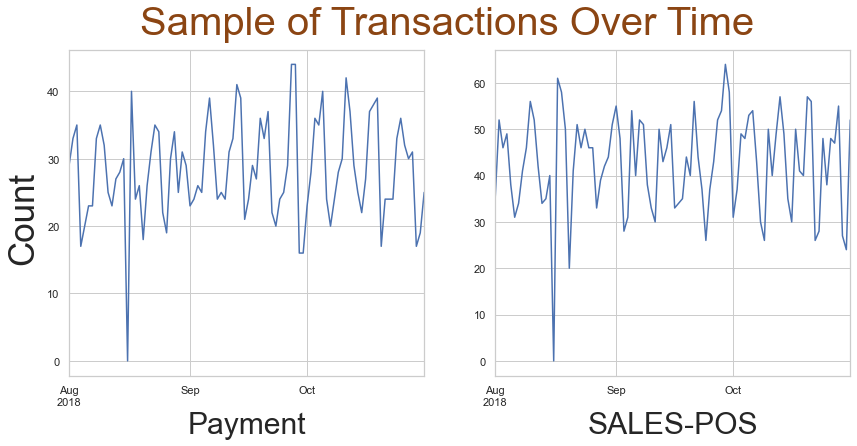

In [9]:
fig, axe = plt.subplots(1,2, figsize=(14, 6))
data.set_index('extraction').txn_description[data.set_index('extraction').txn_description=="PAYMENT"].resample("D").count().plot(ax=axe[0],legend=None)
#data.set_index('extraction').txn_description[data.set_index('extraction').txn_description=="POS"].resample("D").count().plot(ax=axe[1,0],legend=None)
data.set_index('extraction').txn_description[data.set_index('extraction').txn_description=="SALES-POS"].resample("D").count().plot(ax=axe[1],legend=None)
#data.set_index('extraction').txn_description[data.set_index('extraction').txn_description=="INTER BANK"].resample("D").count().plot(ax=axe[1,1],legend=None)
#data.txn_description[data['txn_description']=="PHONE BANK"].resample("D").count().plot(ax=axe[2,0],legend=None)
fig.suptitle('Sample of Transactions Over Time', y=.98, color='saddlebrown',fontsize=40)
#plt.savefig('SampleofTransactionsovertime.png',bbox_inches='tight')
axe[0].set_xlabel('Payment', fontsize=30)
fig.text(0.08,0.4,'Count', ha='center', rotation=90, fontsize= 35)
#axe[1,0].set_xlabel('POS', fontsize=20)
axe[1].set_xlabel("SALES-POS", fontsize=30)
#axe[1,1].set_xlabel("INTER BANK", fontsize=20)
#plt.savefig('SampleTransactiont.png',bbox_inches='tight')
plt.show()

We can see that there is no data entered on 08-16-2018.

In [1]:
data.set_index('extraction')['2018-08-16']

NameError: name 'data' is not defined

In [11]:
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

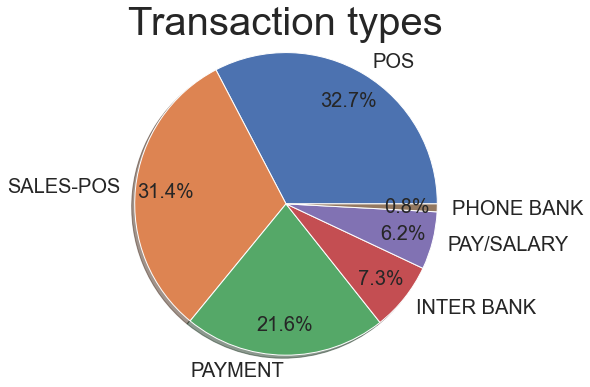

In [12]:
fig1, ax1 = plt.subplots(figsize=(6,6))
labels=['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK']
ax1.pie(data.txn_description.value_counts(), labels=labels, autopct='%1.1f%%', pctdistance=0.8, textprops={'fontsize': 20}, shadow=True)
ax1.axis('equal')
plt.title('Transaction types', fontsize=40)
#plt.savefig('Transactiontypes.png',bbox_inches='tight')
plt.show()

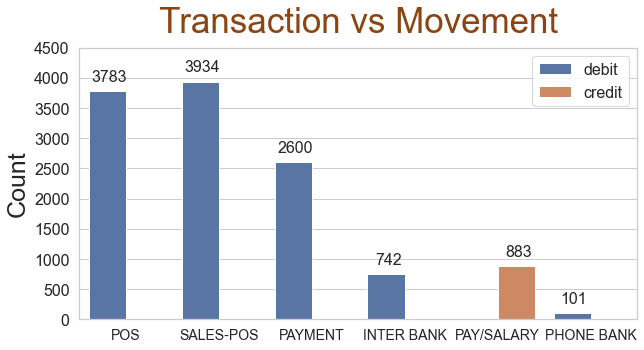

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data['txn_description'], data=data, hue='movement')
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), 
                    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='baseline', xytext=(2, 10), 
                    textcoords='offset points', fontsize=16 )
        
plt.title('Transaction vs Movement', pad=15,color='saddlebrown', fontsize=35)
plt.ylabel('Count', fontsize=25)
plt.xlabel(None)
plt.yticks(list(range(0,4501,500)), fontsize=16)
plt.xticks(fontsize=14)
plt.legend(fontsize=16)
#plt.savefig('TransactionvsMovement.png',bbox_inches='tight')
plt.show()

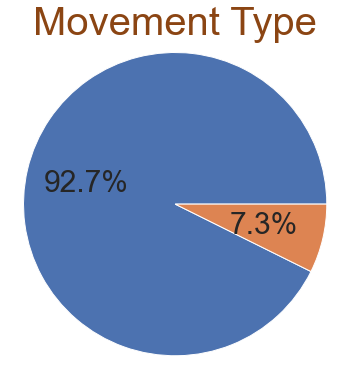

In [14]:
fig1, ax1 = plt.subplots(figsize=(6,6))
labels=['debit','credit']
ax1.pie(data.movement.value_counts(), labels=None, autopct='%1.1f%%',textprops={'fontsize': 30}, pctdistance=.6)
ax1.axis('equal')
plt.title('Movement Type', color='saddlebrown', fontsize=40)
#plt.savefig('MovementType.png',bbox_inches='tight')
plt.show()

In [15]:
max(data.age)

78

In [16]:
min(data.age)

18

In [17]:
(max(data.age) - min(data.age)) 

60

In [18]:
data['gender'] = data['gender'].replace(['M', 'F'], ['Male', 'Female'])

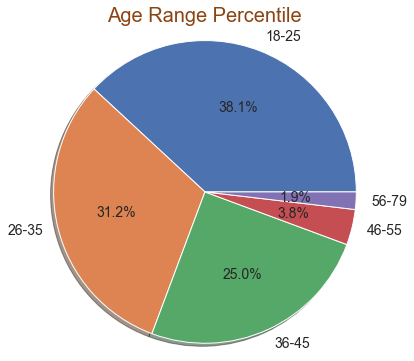

In [19]:
fig1, ax1 = plt.subplots(figsize=(6,6))
labels=['18-25','26-35','36-45','46-55','56-79']
ax1.pie(pd.cut(data['age'], [18,25,35,45,55,79], include_lowest=True).value_counts(), labels=labels,autopct='%1.1f%%', 
        textprops={'fontsize': 14},shadow=True)
ax1.axis('equal')
plt.title("Age Range Percentile", color='saddlebrown', fontsize=20)
#plt.savefig('Age_Range_Percentile.png',bbox_inches='tight')
plt.show()

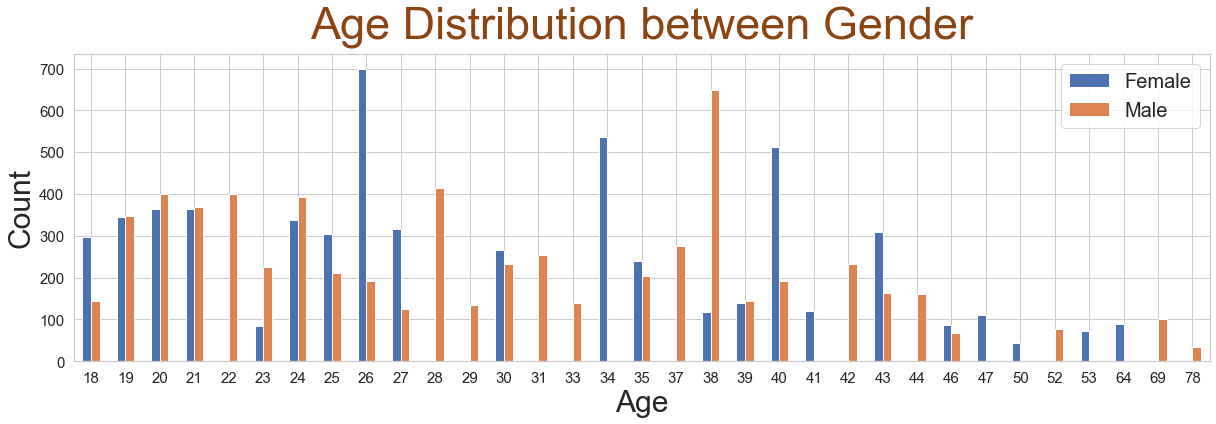

In [20]:
#sns.set()
ax = data.groupby(['gender','age']).size().reset_index().pivot(columns='gender', index='age',
                                                          values=0).plot(figsize=(17,6), kind='bar')
plt.ylabel('Count', fontsize=30)
plt.xlabel('Age', fontsize=30)
plt.title('Age Distribution between Gender', color='saddlebrown', pad = 15, fontsize=45)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
#plt.savefig('Age_Distribution_between_Gender.png',bbox_inches='tight')
plt.tight_layout()

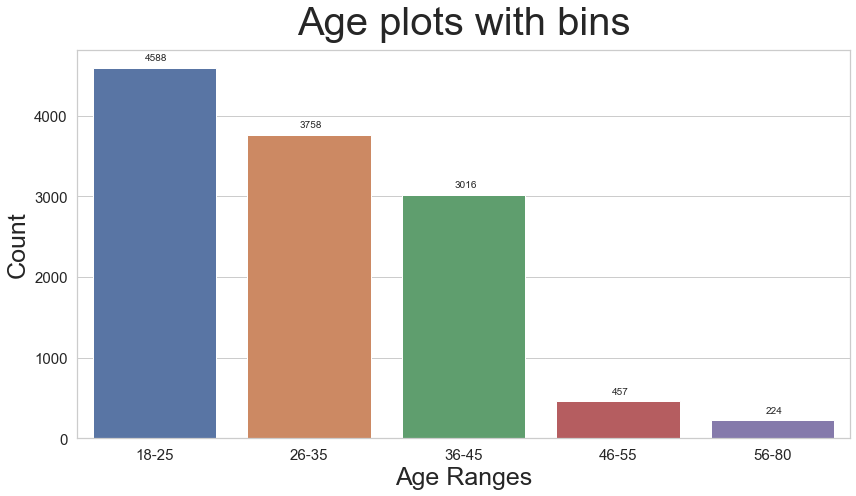

In [21]:
plt.figure(figsize=(12,7))
plt.title("Age plots with bins",pad = 15, fontsize=40)
ax = sns.countplot(pd.cut(data['age'],[18,25,35,45,55,79],labels=['18-25','26-35','36-45','46-55','56-80'], include_lowest=True),data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points')
plt.ylabel('Count', fontsize=25)
plt.xlabel('Age Ranges', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Ageplotswithbins.png',bbox_inches='tight')
plt.tight_layout()

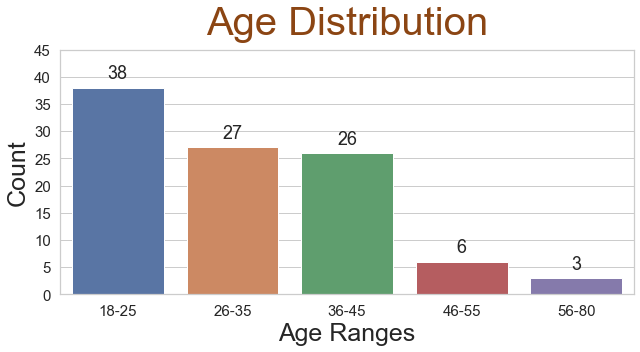

In [23]:
plt.figure(figsize=(9,5))
plt.title("Age Distribution",loc='center',color='saddlebrown', pad=15, fontsize=40)
ax = sns.countplot(pd.cut(dage['age'],[18,25,35,45,55,79],labels=['18-25','26-35','36-45','46-55','56-80'],
                          include_lowest=True),data=dage)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=18)
plt.ylabel('Count', fontsize=25)
plt.xlabel('Age Ranges', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(list(range(0,46,5)),fontsize=15)
#plt.savefig('Age_Dist_with_bins.png',bbox_inches='tight')
plt.tight_layout()

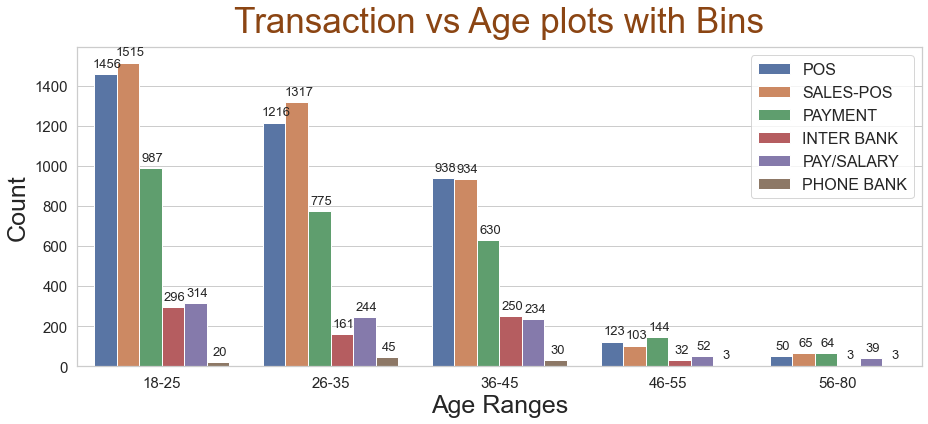

In [24]:
plt.figure(figsize=(13,6))
plt.title('Transaction vs Age plots with Bins', pad=15, color='saddlebrown', fontsize=35)
ax = sns.countplot(pd.cut(data['age'],[18,25,35,45,55,79], labels=['18-25','26-35','36-45','46-55','56-80'],
                          include_lowest=True), hue='txn_description',data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset pixels', fontsize=13)

plt.ylabel('Count', fontsize=25)
plt.xlabel('Age Ranges', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16)
#plt.savefig('TransactionvsAgeplotswithbins.png',bbox_inches='tight')
plt.tight_layout()

C:\Users\brook\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


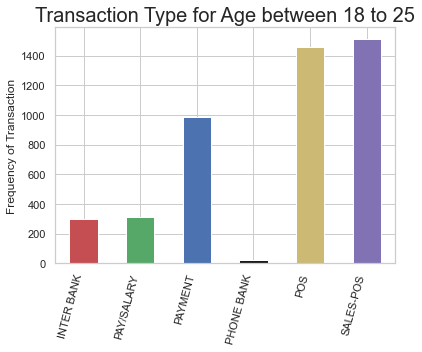

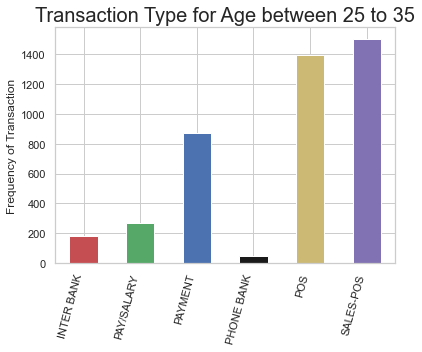

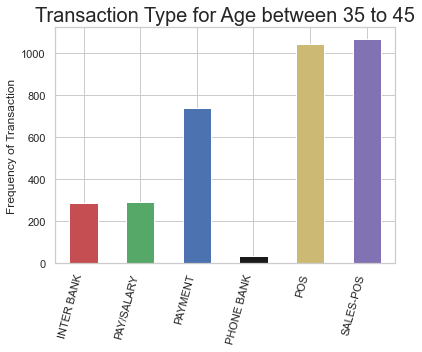

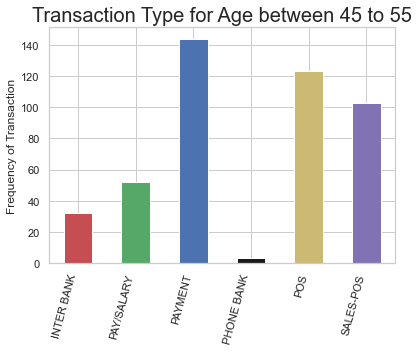

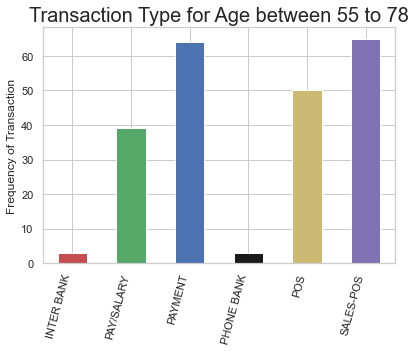

In [25]:
age_range = [(18,25),(25,35),(35,45), (45,55), (55, 78)]

for pair in age_range:
    age=data[(data['age']>=pair[0]) & (data['age']<=pair[1])]
    ax1 = pd.crosstab(age.txn_description, [(age['age']>=pair[0]) & (age['age']<=pair[1])]
                     ).plot(figsize=(6,5),kind='bar', legend=None, color=('rgbkym')).axes
    ax1.xaxis.label.set_visible(False)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75, horizontalalignment='right')
    plt.title(f'Transaction Type for Age between {pair[0]} to {pair[1]}', fontsize=20)
    plt.ylabel('Frequency of Transaction')
    plt.tight_layout()

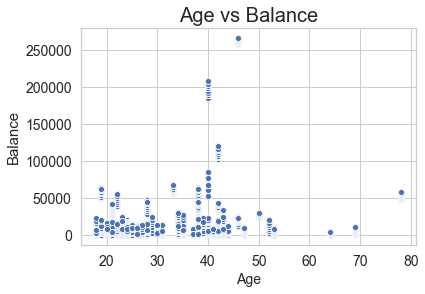

In [26]:
sns.scatterplot(x='age',y='balance',data=data)
plt.title('Age vs Balance', fontsize=20)
plt.ylabel('Balance', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('AgevsBalance.png',bbox_inches='tight')
plt.show()

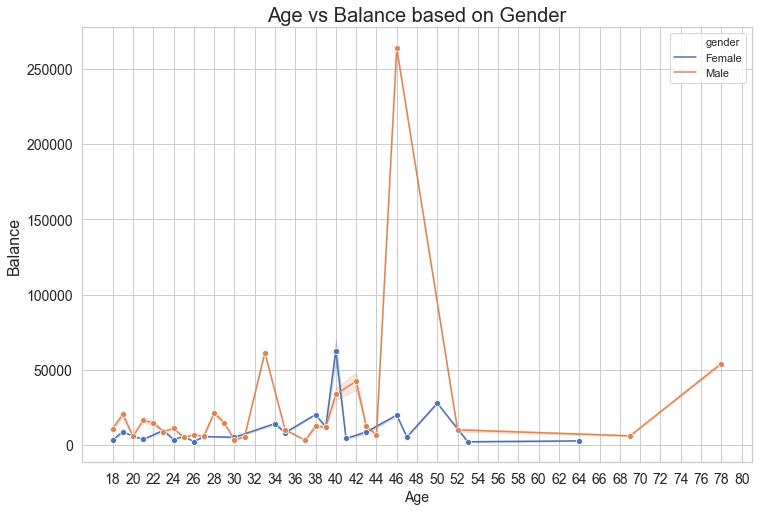

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x='age',y='balance', hue='gender', marker='o')
plt.title('Age vs Balance based on Gender', fontsize=20)
plt.ylabel('Balance', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.xticks(list(range(18,82,2)), fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Age_vs_Balance_based_on_Gender.png',bbox_inches='tight')
plt.show()

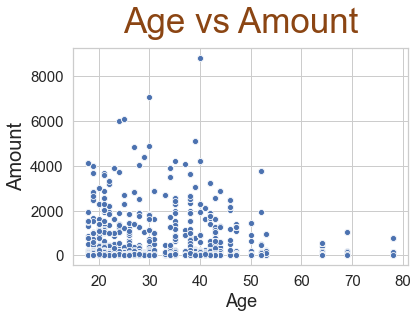

In [28]:
sns.scatterplot(x='age',y='amount',data=data)
plt.title('Age vs Amount',color='saddlebrown', pad=15, fontsize=35)
plt.ylabel('Amount', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Age_vs_Amount.png',bbox_inches='tight')
plt.show()

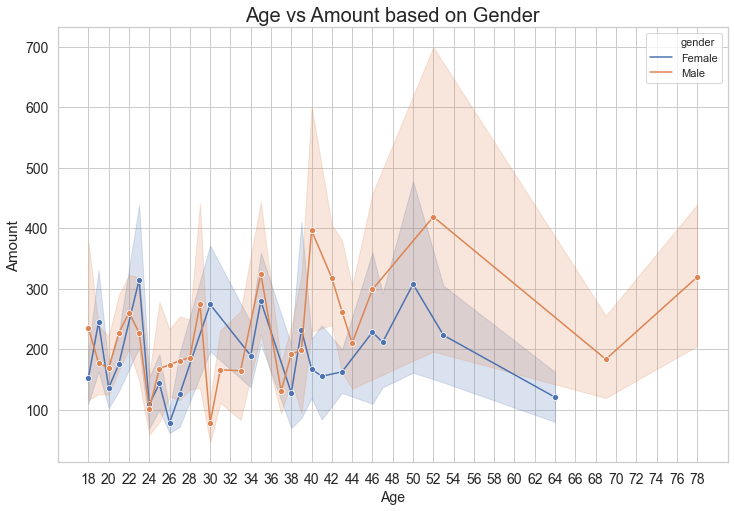

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x='age',y='amount', hue='gender', marker='o')
plt.title('Age vs Amount based on Gender', fontsize=20)
plt.ylabel('Amount', fontsize=15)
plt.xticks(list(range(18,80,2)), fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Age_vs_Amount_based_on_Gender.png',bbox_inches='tight')
plt.show()

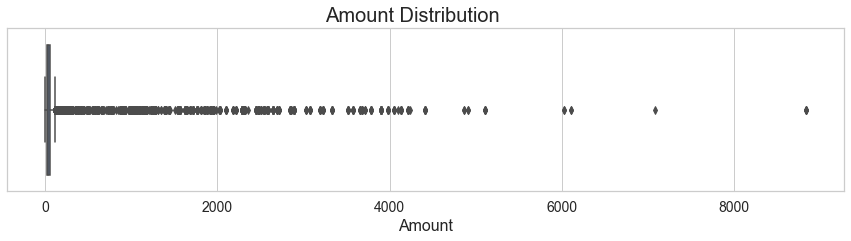

In [30]:
plt.figure(figsize=(15,3))
sns.boxplot(data['amount'])
plt.suptitle('Amount Distribution', fontsize=20)
plt.xlabel('Amount', fontsize= 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Amount_Distribution.png',bbox_inches='tight')
plt.show()

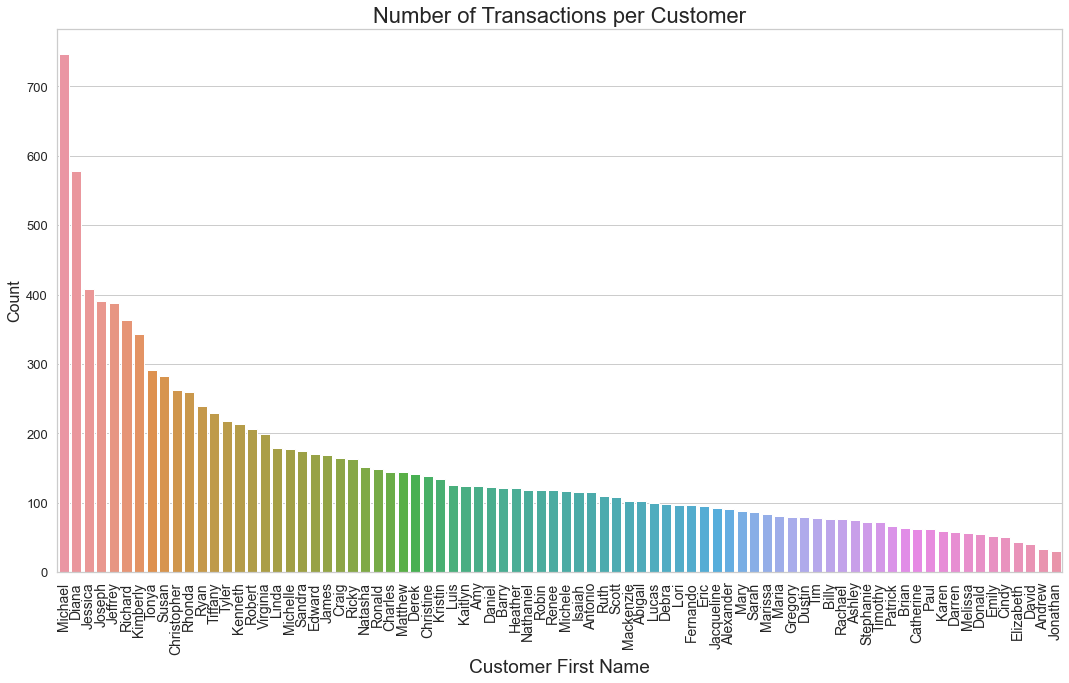

In [31]:
plt.figure(figsize=(18,10))
asx = sns.countplot(data['first_name'],order=data['first_name'].value_counts().index)
#sns.set(font_scale=2)
plt.xlabel('Customer First Name', fontsize=19)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Transactions per Customer', fontsize=22)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=13)
#plt.savefig('Number_of_Transactions_per_Customer.png',bbox_inches='tight')
plt.show()

In [32]:
data.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

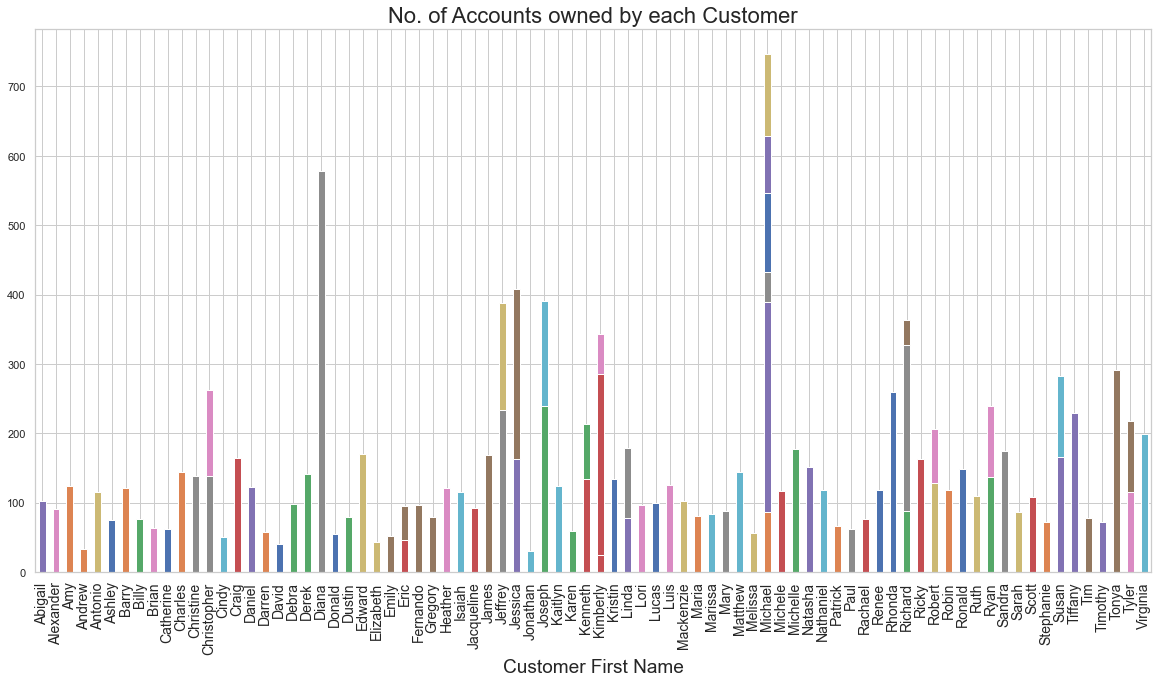

In [33]:
data.groupby(['first_name','account']).size().reset_index().pivot(columns='account', index='first_name',
                                                    values=0).plot(figsize=(20,10),kind='bar', stacked=True, legend=False)
plt.title('No. of Accounts owned by each Customer', fontsize=22)
plt.xlabel('Customer First Name', fontsize=19)
plt.xticks(fontsize=14)
#plt.savefig('No_of_Accounts_owned_by_each_Customer.png',bbox_inches='tight')
plt.show()

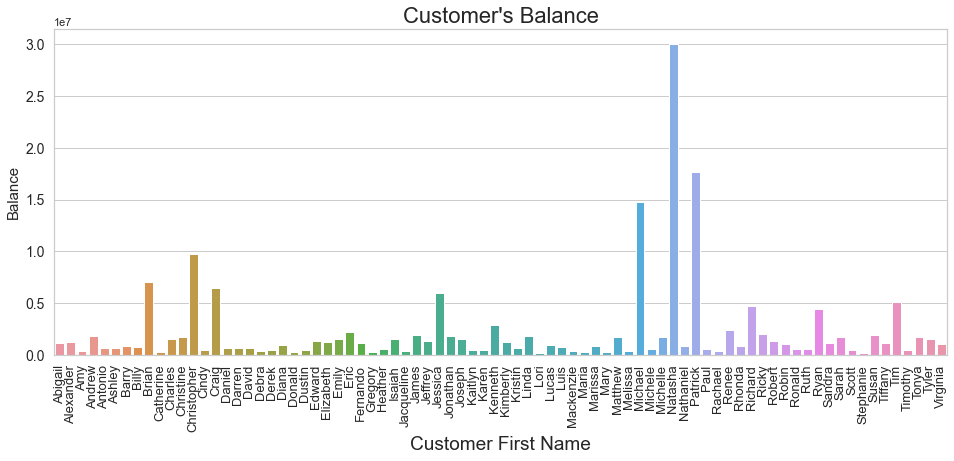

In [34]:
plt.figure(figsize=(16, 6))
sns.barplot(y="balance", x="first_name", data=data.groupby(['first_name'])["balance"].sum().reset_index())
plt.xticks(fontsize=13,rotation=90)
plt.title("Customer's Balance", fontsize=22)
plt.ylabel('Balance', fontsize=15)
plt.xlabel('Customer First Name', fontsize=19)
plt.yticks(fontsize=14)
#plt.savefig("Customer's_Balance.png",bbox_inches='tight')
plt.show()

In [35]:
data['month'] = pd.DatetimeIndex(data['extraction']).month
data['week'] = pd.DatetimeIndex(data['extraction']).week
data['dayofweek'] = pd.DatetimeIndex(data['extraction']).dayofweek
data['day'] = pd.DatetimeIndex(data['extraction']).day
data['hour'] = pd.DatetimeIndex(data['extraction']).hour
data['month'] = data['month'].replace([8,9,10],['August', 'September', 'October'])
data['dayofweek'] = data['dayofweek'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,week,dayofweek,day,hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,Female,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August,31,Wednesday,1,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,Female,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August,31,Wednesday,1,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,Male,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,August,31,Wednesday,1,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,Female,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,August,31,Wednesday,1,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,Female,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,August,31,Wednesday,1,1


In [36]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
data['dayofweek'] = data['dayofweek'].astype(cat_type)

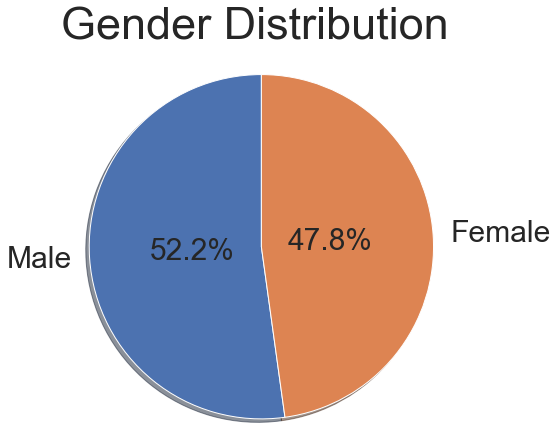

In [37]:
fig1, ax1 = plt.subplots(figsize=(8,7))
labels=['Male', 'Female']
ax1.pie(data.gender.value_counts(), labels=labels, autopct='%1.1f%%',pctdistance=0.4, textprops={'fontsize': 30},
        shadow=True, startangle= 90.0)
ax1.axis('equal')
plt.suptitle('Gender Distribution', fontsize=45)
plt.savefig('Gender_Distribution.png',bbox_inches='tight')
plt.show()

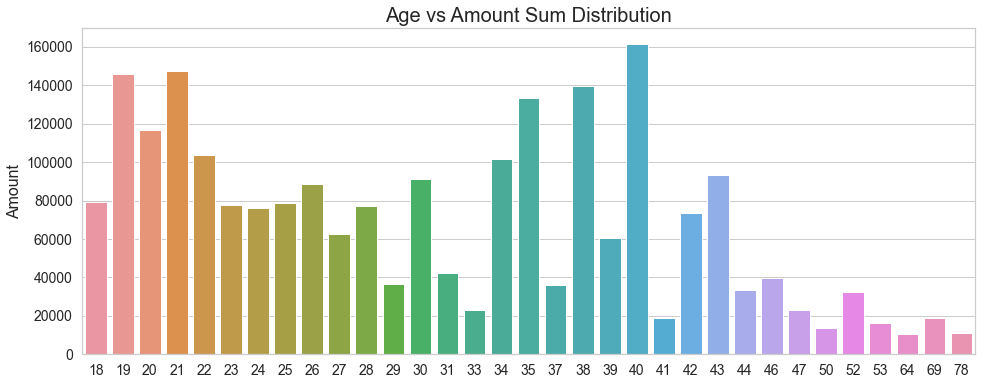

In [38]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=data.groupby('age')["amount"].sum().reset_index())
plt.title('Age vs Amount Sum Distribution', fontsize=20)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Age_vs_Amount_Sum_Distribution.png',bbox_inches='tight')
plt.show()

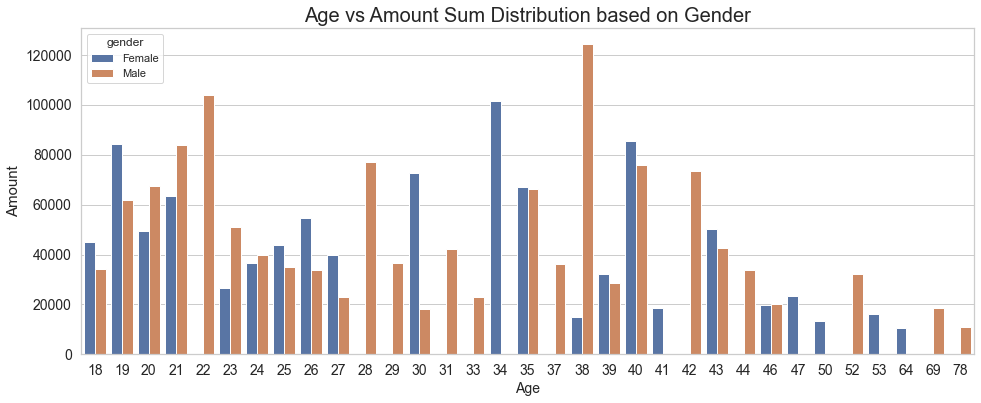

In [39]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender" ,data=data.groupby(['age',"gender"])["amount"].sum().reset_index())
plt.title('Age vs Amount Sum Distribution based on Gender', fontsize=20)
plt.ylabel('Amount', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Age_vs_Amount_Sum_Distribution_based_on_Gender.png',bbox_inches='tight')
plt.show()

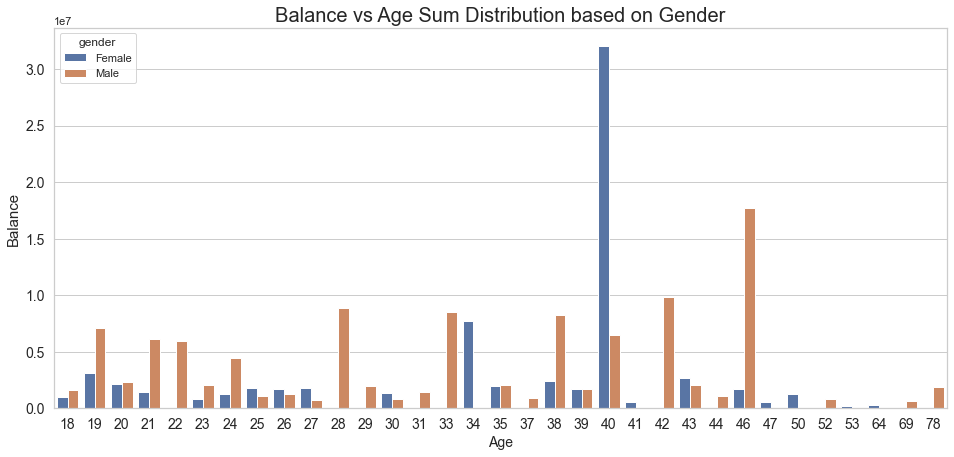

In [40]:
plt.figure(figsize=(16, 7))
sns.barplot(y="balance", x="age", hue="gender" ,data=data.groupby(['age',"gender"])["balance"].sum().reset_index())
plt.title('Balance vs Age Sum Distribution based on Gender', fontsize=20)
plt.ylabel('Balance', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('Balance vs Age Sum Distribution based on Gender.png',bbox_inches='tight')
plt.show()

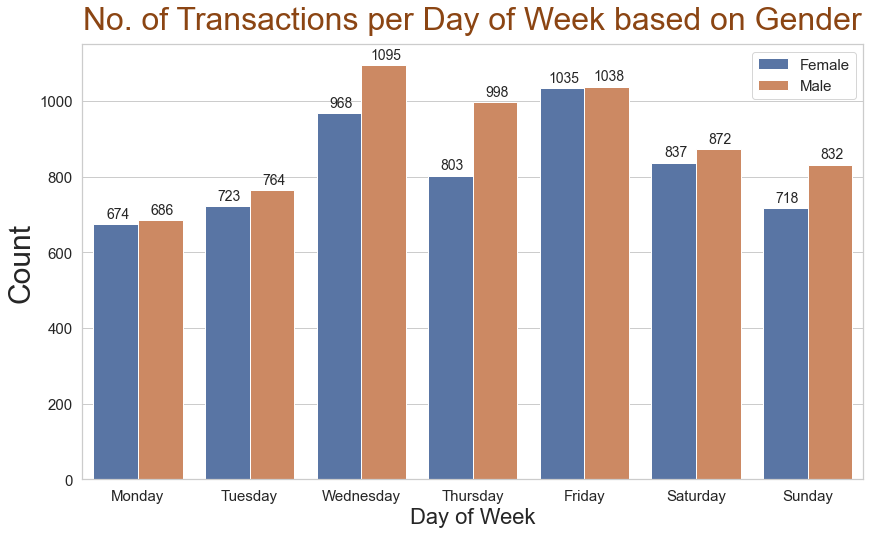

In [41]:
fig, axe = plt.subplots(figsize=(14, 8))
ax = sns.countplot(x=data['dayofweek'].sort_values(), hue='gender', data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=14)
plt.title('No. of Transactions per Day of Week based on Gender', pad=15, color='saddlebrown', fontsize=32)
plt.xlabel('Day of Week', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.ylabel('Count', fontsize=30)
#plt.savefig('No_of_Transactions_per_Week_based_on_Gender.png',bbox_inches='tight')
plt.show()

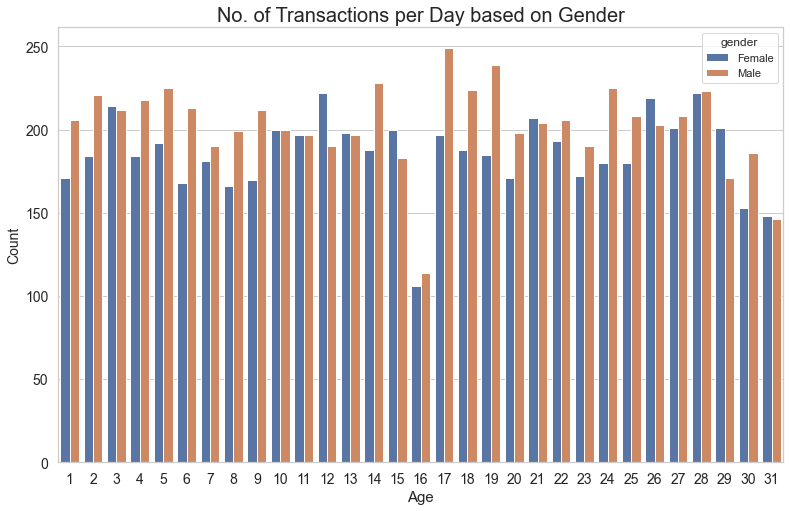

In [42]:
fig, axe = plt.subplots(figsize=(13, 8))
sns.countplot(x=data['day'], hue='gender', data=data)
plt.title('No. of Transactions per Day based on Gender', fontsize=20)
plt.xlabel("Age", fontsize= 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.savefig('No_of_Transactions_per_Day_based_on_Gender.png',bbox_inches='tight')
plt.show()

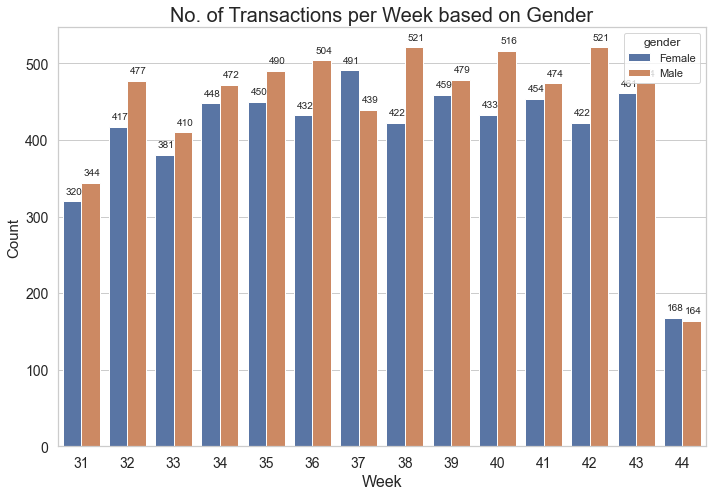

In [43]:
fig, axe = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x=data['week'], hue='gender', data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points')
plt.title('No. of Transactions per Week based on Gender', fontsize=20)
plt.xlabel("Week", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=15)
#plt.savefig('No_of_Transactions_per_Week_based_on_Gender.png',bbox_inches='tight')
plt.tight_layout()

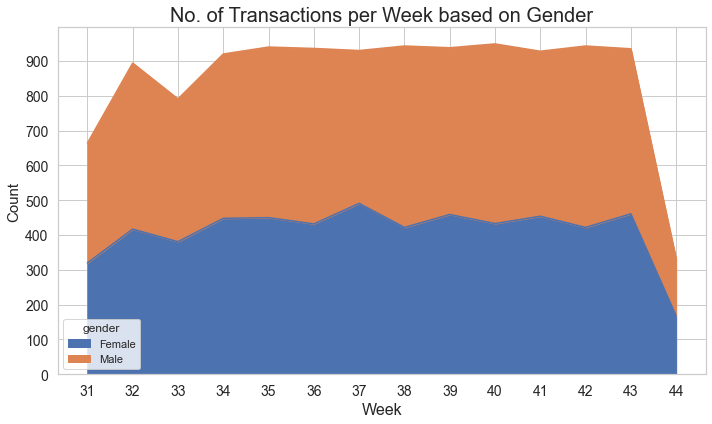

In [44]:
data.groupby(['week','gender']).size().reset_index().pivot(columns="gender", index='week',
                                                            values=0).plot(figsize=(10,6),kind='area')
plt.title('No. of Transactions per Week based on Gender', fontsize=20)
plt.xlabel("Week", fontsize=16)
plt.xticks(list(range(31,45,1)), fontsize=14)
plt.yticks(list(range(0,1000,100)), fontsize=14)
plt.ylabel('Count', fontsize=15)
#plt.savefig('No_of_Transactions_per_Week_based_on_Gender1.png',bbox_inches='tight')
plt.tight_layout()

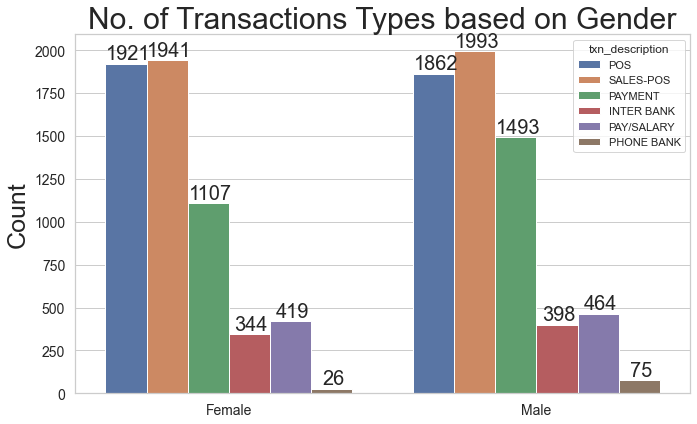

In [45]:
fig, axe = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x=data.gender, hue='txn_description', data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=20)
plt.title('No. of Transactions Types based on Gender', fontsize=30)
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=25)
#plt.savefig('No_of_Transactions_Types_based_on_Gender.png',bbox_inches='tight')
plt.tight_layout()

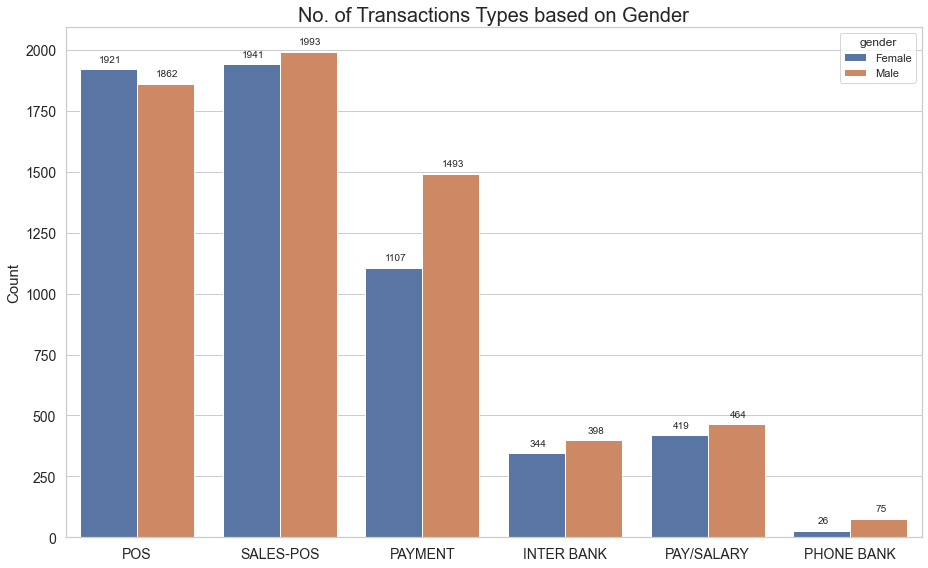

In [46]:
fig, axe = plt.subplots(figsize=(13, 8))
ax = sns.countplot(x=data.txn_description, hue='gender', data=data)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points')
plt.title('No. of Transactions Types based on Gender', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

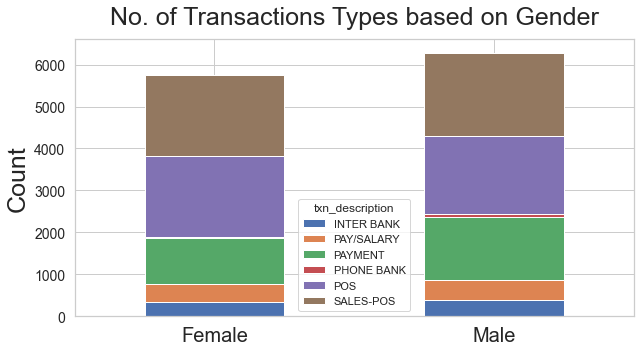

In [47]:
data.groupby(['gender','txn_description']).size().reset_index().pivot(columns="txn_description", index='gender',
                                                values=0).plot(figsize=(9,5),kind='bar', stacked=True)
plt.title('No. of Transactions Types based on Gender', pad=15, fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=25)
#plt.savefig('No_of_Transactions_Types_based_on_Gender1.png',bbox_inches='tight')
plt.tight_layout()

In [48]:
data['merchant_state'] = data['merchant_state'].replace(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'],
                             ['Australian Capital Territory','New South Wales','Northern Territory','Queensland',
                              'South Australia', 'Tasmania', 'Victoria', 'Western Australia'])

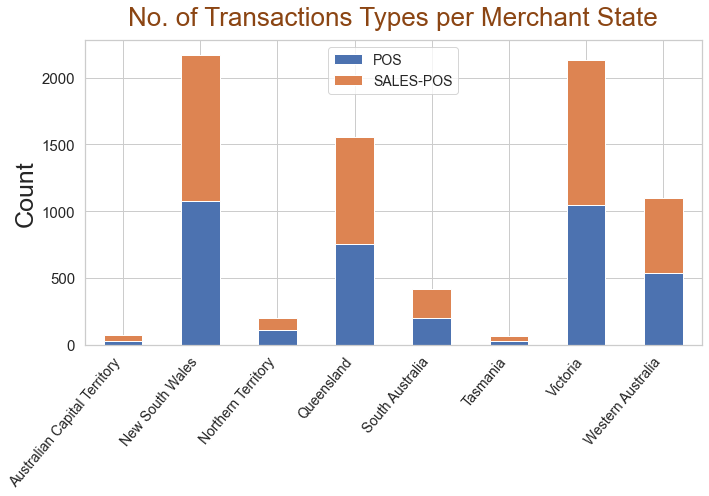

In [49]:
data.groupby(['merchant_state','txn_description']).size().reset_index().pivot(columns="txn_description", 
                            index='merchant_state',values=0).plot(figsize=(10,7),kind='bar', stacked=True)
plt.title('No. of Transactions Types per Merchant State', pad=15, color='saddlebrown', fontsize=26)
plt.xlabel(None)
plt.xticks(fontsize=14, rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=25)
#plt.savefig('No_of_Transactions_Types_per_Merchant_State.png',bbox_inches='tight')
plt.legend(fontsize=14)
plt.tight_layout()

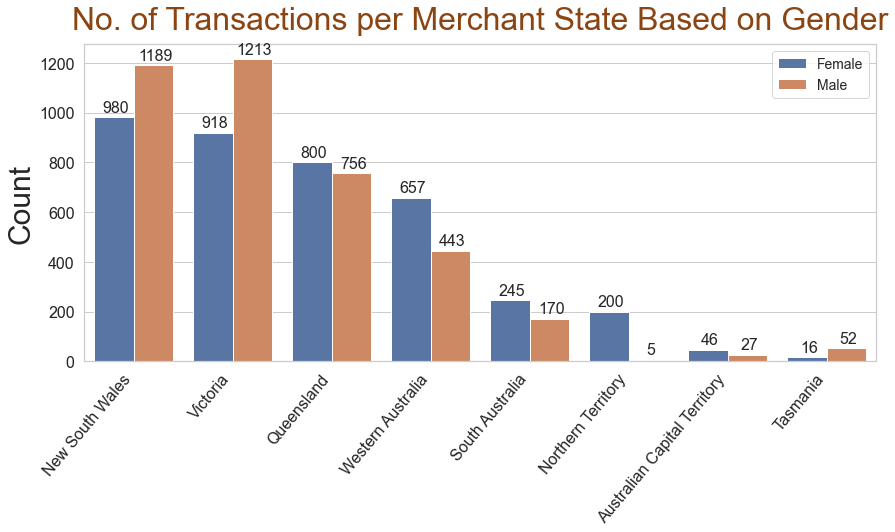

In [50]:
plt.figure(figsize=(13,7.5))
ax = sns.countplot(data.merchant_state,hue=data.gender,order=data.merchant_state.value_counts().index)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=16)
plt.title('No. of Transactions per Merchant State Based on Gender', pad=15, color='saddlebrown', fontsize=32)
plt.xlabel(None)
plt.xticks(fontsize=16, rotation=50, ha='right')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=30)
#plt.savefig('No_of_Transactions_Types_per_Merchant_State_based_on_Gender.png',bbox_inches='tight')
plt.legend(fontsize=14)
plt.tight_layout()

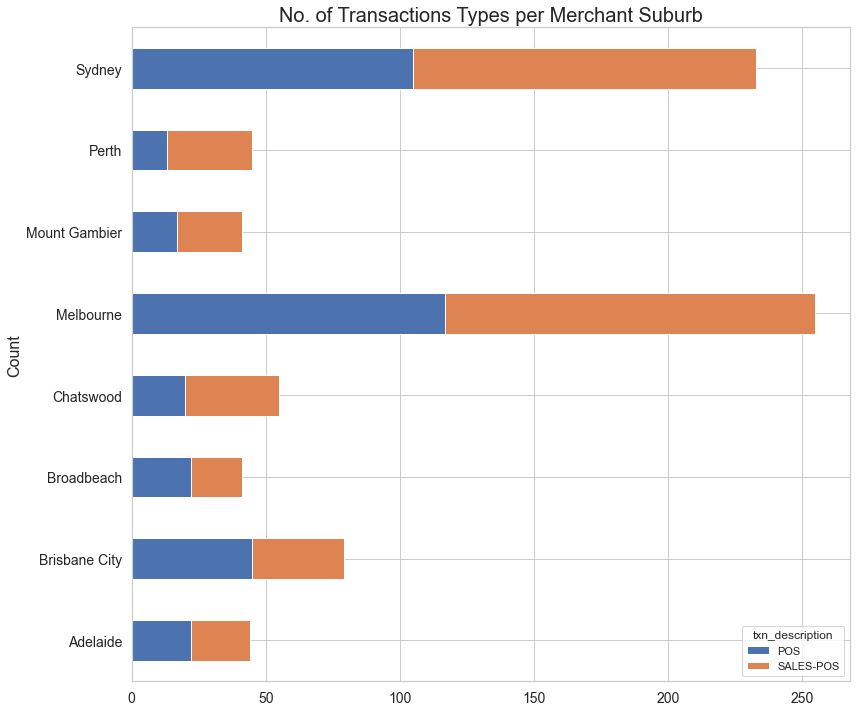

In [51]:
dd=data[data.merchant_suburb.isin(['Melbourne', 'Sydney', 'Southport ', 'Brisbane City', 'Chatswood','Perth',
                                   'Adelaide','Broadbeach','Mount Gambier'])]
dd.groupby(['txn_description','merchant_suburb']).size().reset_index().pivot(columns='txn_description', 
                                        index='merchant_suburb', values=0).plot(figsize=(12,10),kind='barh', stacked=True)
plt.title('No. of Transactions Types per Merchant Suburb', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.tight_layout()

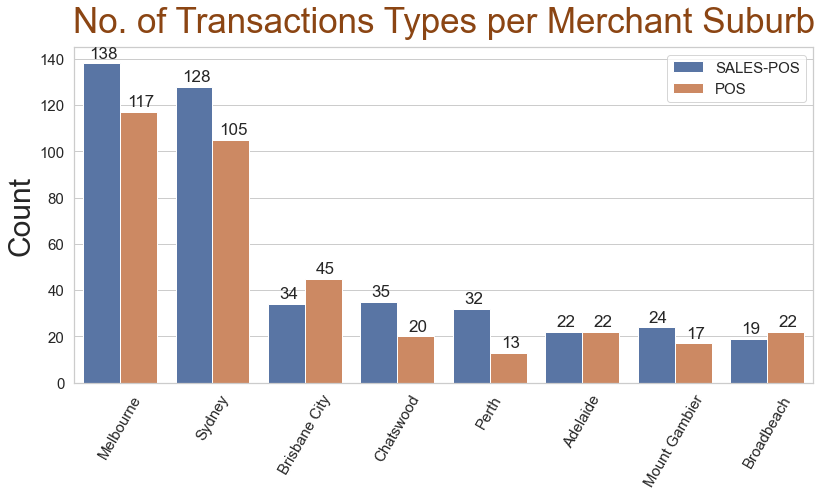

In [52]:
plt.figure(figsize=(12,7))
ax = sns.countplot(dd.merchant_suburb,hue=dd.txn_description,order=dd.merchant_suburb.value_counts().index)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=17)
plt.title('No. of Transactions Types per Merchant Suburb', pad=15, color='saddlebrown', fontsize=35)
plt.xlabel(None)
plt.xticks(fontsize=15, rotation=60)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=30)
#plt.savefig('No_of_Transactions_Types_per_Merchant_Suburb.png',bbox_inches='tight')
plt.legend(fontsize=15)
plt.tight_layout()

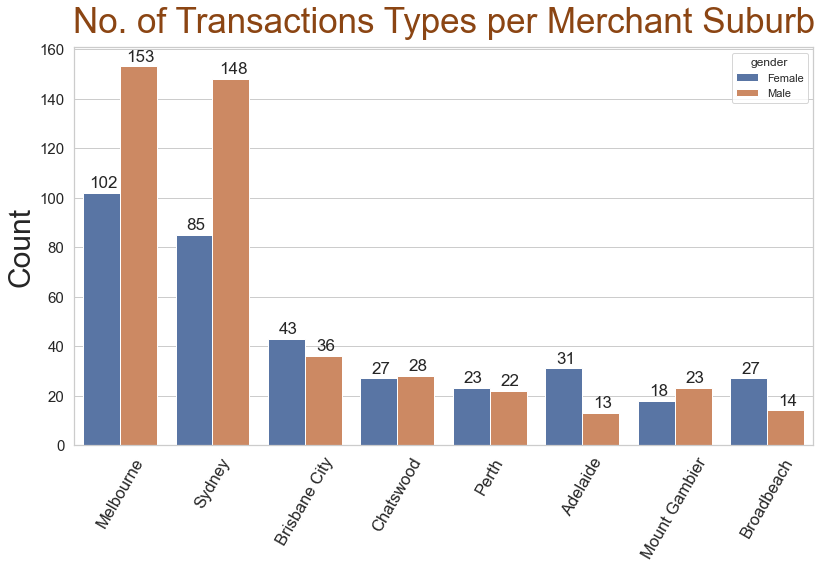

In [53]:
plt.figure(figsize=(12,8))
ax = sns.countplot(dd.merchant_suburb,hue=dd.gender,order=dd.merchant_suburb.value_counts().index)
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=17)
plt.title('No. of Transactions Types per Merchant Suburb',pad=15, color='saddlebrown', fontsize=35)
plt.xlabel(None)
plt.xticks(fontsize=16.5, rotation=60)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=30)
#plt.savefig('No_of_Transactions_per_Merchant_Suburb_based_on_Gender.png',bbox_inches='tight')
plt.tight_layout()

In [54]:
data.dayofweek.unique()

[Wednesday, Thursday, Friday, Saturday, Sunday, Monday, Tuesday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

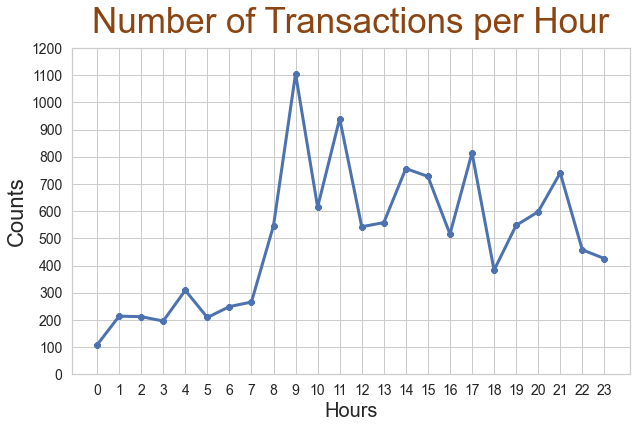

In [55]:
plt.figure(figsize=(10,6))
#style must be one of white, dark, whitegrid, darkgrid, ticks
lines = data.hour.value_counts().sort_index().plot.line(lw=3, marker='8')
plt.xticks(list(range(0,24)), fontsize=14)
plt.yticks(list(range(0,1300,100)), fontsize=14)
plt.title("Number of Transactions per Hour",color='saddlebrown', pad=15, fontsize=35)
plt.ylabel('Counts', fontsize=22)
plt.xlabel('Hours', fontsize=20)
#plt.savefig('Number_of_Transactions_per_Hour.png',bbox_inches='tight')
plt.show()

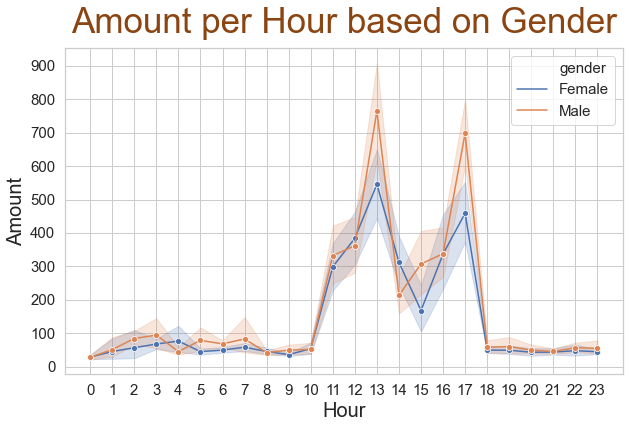

In [56]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='hour',y='amount', hue='gender', marker='o')
plt.xticks(list(range(0,24)), fontsize=15)
plt.yticks(list(range(0,1000,100)), fontsize=15)
plt.title("Amount per Hour based on Gender",color='saddlebrown', pad=15, fontsize=35)
plt.ylabel('Amount', fontsize=20)
plt.xlabel('Hour', fontsize=20)
plt.legend(fontsize=15)
#plt.savefig('Amount_per_Hour_based_on_Gender.png',bbox_inches='tight')
plt.show()

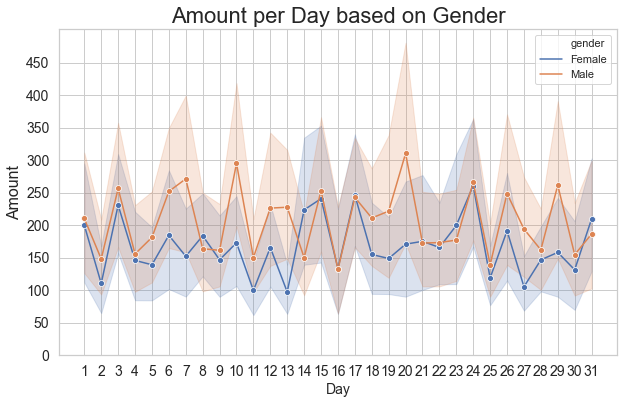

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='day',y='amount', hue='gender', marker='o')
plt.xticks(list(range(1,32)), fontsize=14)
plt.yticks(list(range(0,500,50)), fontsize=14)
plt.title("Amount per Day based on Gender", fontsize=22)
plt.ylabel('Amount', fontsize=16)
plt.xlabel('Day', fontsize=14)
#plt.savefig('Amount_per_Day_based_on_Gender.pdf',bbox_inches='tight')
plt.show()

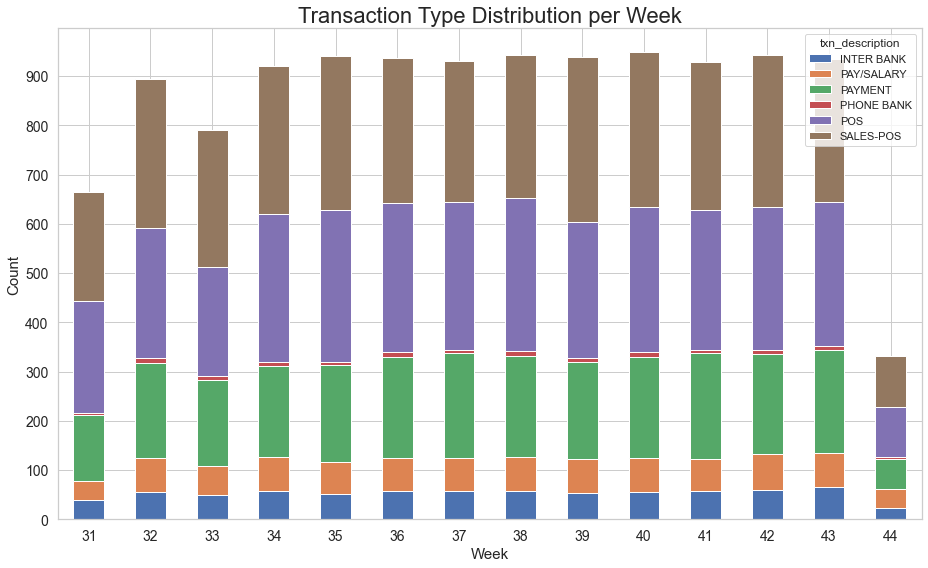

In [58]:
data.groupby(['week','txn_description']).size().reset_index().pivot(columns="txn_description", index='week',
                                                                    values=0).plot(figsize=(13,8),kind='bar', stacked=True)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(list(range(0,1000,100)), fontsize=14)
plt.title("Transaction Type Distribution per Week", fontsize=22)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.tight_layout()
#plt.savefig('Transaction_Type_Distribution_per_Week.pdf',bbox_inches='tight')
plt.show()

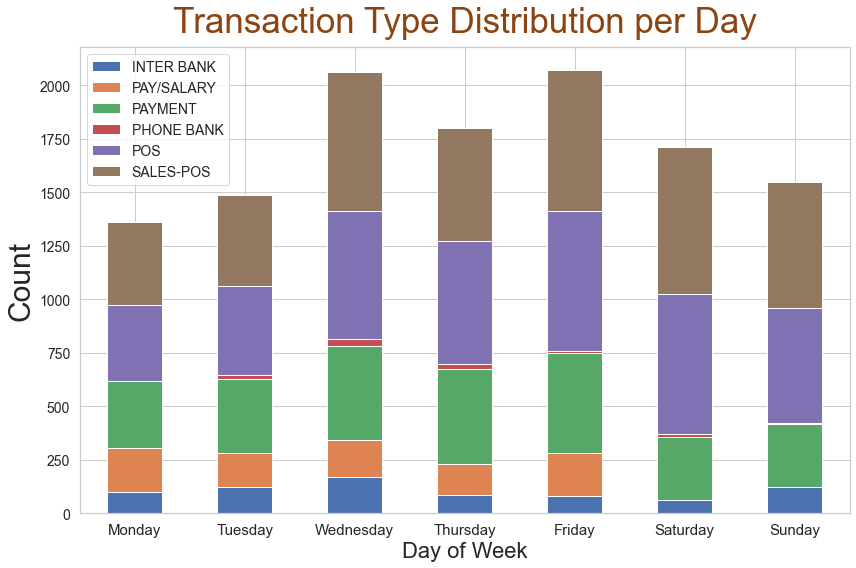

In [60]:
data.groupby(['dayofweek','txn_description']).size().reset_index().pivot(columns="txn_description", 
                                                index='dayofweek',values=0).plot(figsize=(12,8),kind='bar', stacked=True)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=14)
plt.title("Transaction Type Distribution per Day", pad=15, color='saddlebrown', fontsize=35)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Day of Week', fontsize=22)
#plt.savefig('Transaction_Type_Distribution_per_Day.png', bbox_inches='tight')
plt.legend(fontsize=14)
plt.tight_layout()

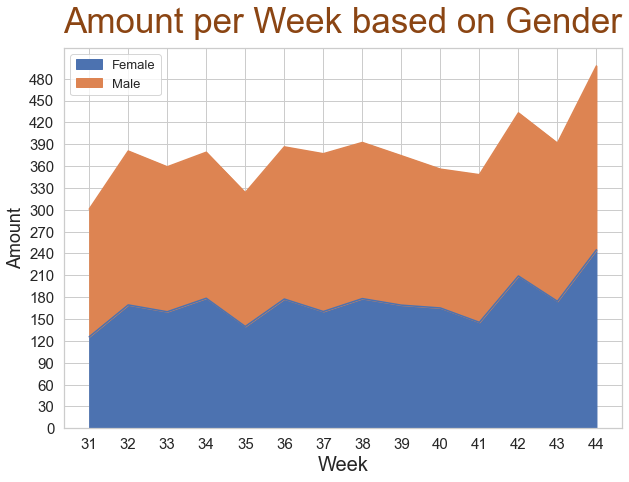

In [61]:
data.groupby(['week','gender'])['amount'].mean().reset_index().pivot(columns='gender', 
                                            index='week', values='amount').plot(figsize=(10,7),kind='area', stacked=True)
plt.xticks(list(range(31,45,1)), fontsize=15)
plt.yticks(list(range(0,500,30)), fontsize=15)
plt.title("Amount per Week based on Gender",color='saddlebrown', pad=15, fontsize=35)
plt.ylabel('Amount', fontsize=18)
plt.xlabel('Week', fontsize=20)
plt.legend(fontsize=13)
#plt.savefig('Amount_per_Week_based_on_Gender.png',bbox_inches='tight')
plt.show()

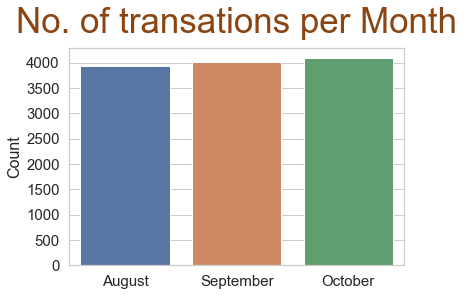

In [62]:
plt.title('No. of transations per Month', color='saddlebrown', pad=15, fontsize=35)
sns.countplot(data['month'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=16)
plt.xlabel(None)
#plt.savefig('No_of_Transations_per_Month.pdf',bbox_inches='tight')
plt.show()

In [63]:
 data1 = data[data['status'] != "posted"]
# lat = data1['merchant_long_lat'].str.split("-", n = 1, expand = True)[0].values
# long = data1['merchant_long_lat'].str.split("-", n = 1, expand = True)[1].values
# data1 = data1.reindex(columns = data1.columns.tolist() + ['long','lat'])
# data1['lat'] = lat
# data1['long'] = long1
# data1[["long", "lat"]] = data1[["long", "lat"]].apply(pd.to_numeric)

In [64]:
data1.shape

(7717, 28)

In [65]:
data1.describe()

,card_present_flag,merchant_code,balance,age,amount,week,day,hour
count,7717.000000,0.0,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000,7717.000000
mean,0.802644,NaN,11871.056585,30.052093,40.153732,37.355967,15.927822,13.412207
std,0.398029,NaN,25999.398243,9.439454,149.833070,3.772207,8.957786,5.769436
min,0.000000,NaN,0.240000,18.000000,0.100000,31.000000,1.000000,0.000000
25%,1.000000,NaN,2723.890000,23.000000,12.080000,34.000000,8.000000,9.000000
50%,1.000000,NaN,5286.040000,27.000000,19.700000,37.000000,16.000000,14.000000
75%,1.000000,NaN,10278.290000,38.000000,33.910000,41.000000,24.000000,19.000000
max,1.000000,NaN,267093.660000,78.000000,7081.090000,44.000000,31.000000,23.000000


In [66]:
data1.isnull().sum()

status                  0
card_present_flag       0
bpay_biller_code     7715
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        7717
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat       0
movement                0
month                   0
week                    0
dayofweek               0
day                     0
hour                    0
dtype: int64

In [67]:
data1 = data1.reindex(columns = data1.columns.tolist() + ['long','lat'])
longitude=[]
latitude=[]

for row in data1['merchant_long_lat']:
    longitude.append(row.split(' ')[0])
    latitude.append(row.split(' ')[1])
    
data1["long"]=longitude
data1["lat"]=latitude

In [68]:
data1[["long", "lat"]] = data1[["long", "lat"]].apply(pd.to_numeric)

In [74]:
from shapely.geometry import shape, Point
import geopandas as gpd
from geopandas import GeoDataFrame

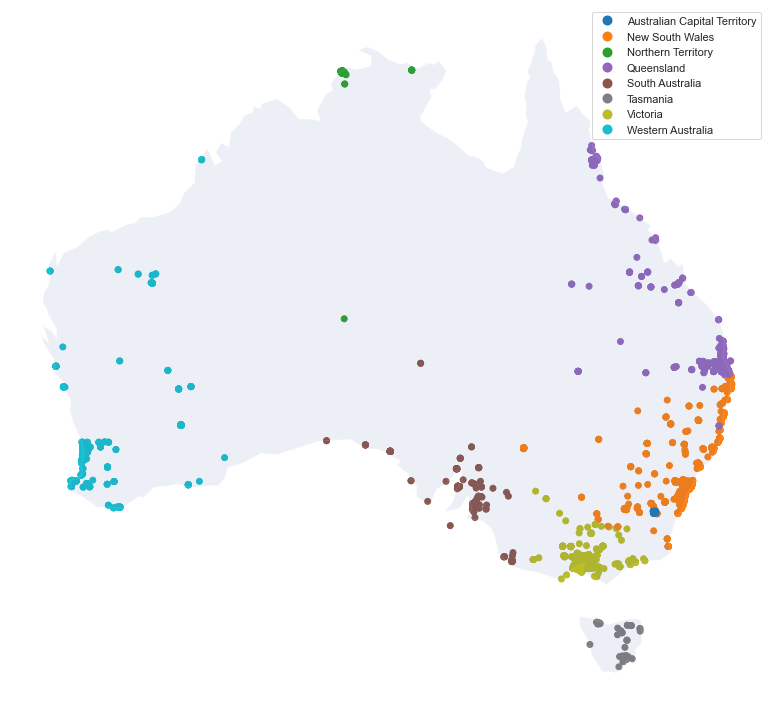

In [76]:
#Plotting the transactions over the map of australia

geometry = [Point(xy) for xy in zip(data1['long'], data1['lat'])]
gdf = GeoDataFrame(data1, geometry=geometry)   

#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

aus =  world[world.name == "Australia"]

ax=aus.plot(ax=gdf.plot(figsize=(14, 10), column='merchant_state', legend=True),marker='o', markersize=20, alpha = .1)
ax.axis('off')
plt.tight_layout()
#plt.savefig('Map1.png',bbox_inches='tight')

In [77]:
data11 = data1[data1['first_name'].isin(['Diana', 'Michael', 'Jeffrey', 'Joseph', 'Jessica'])]

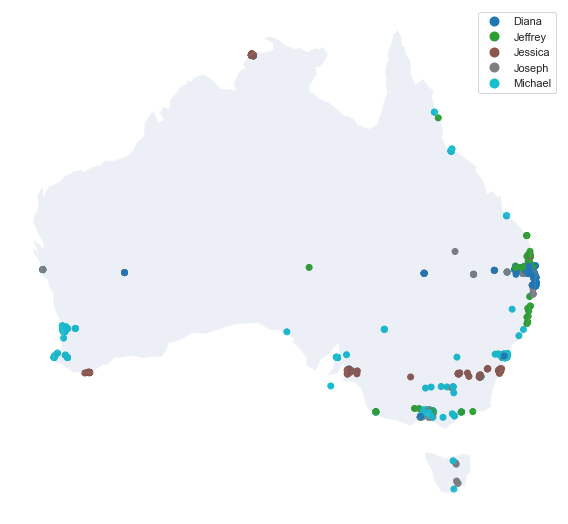

In [78]:
#Plotting the transactions over the map of australia

geometry = [Point(xy) for xy in zip(data11['long'], data11['lat'])]
gdf = GeoDataFrame(data11, geometry=geometry)   

#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

aus =  world[world.name == "Australia"]

ax=aus.plot(ax=gdf.plot(figsize=(8, 8), column='first_name', legend=True),marker='o', markersize=20, alpha = .1)
ax.axis('off')
plt.tight_layout()
plt.show()

# Task 2 Basic predictive modelling

### Modifying data to obtain salaries for each customer

In [80]:
df_salaries = data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount,week,day,hour
customer_id,,,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53.0,970.47,38.0,16.000000,16.0
CUS-1117979751,NaN,0.0,11957.202857,21.0,3578.65,38.0,13.000000,11.0
CUS-1140341822,NaN,0.0,5841.720000,28.0,1916.51,37.0,14.333333,16.0
CUS-1147642491,NaN,0.0,8813.467692,34.0,1711.39,38.0,15.000000,11.0
CUS-1196156254,NaN,0.0,23845.717143,34.0,3903.73,37.0,16.714286,16.0


In [82]:
salaries = []

for customer_id in data["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
data["annual_salary"] = salaries

In [83]:
df_cus = data.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,week,day,hour,annual_salary
customer_id,,,,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53.0,222.862603,34.808219,15.082192,11.753425,970.0
CUS-1117979751,0.826923,0.0,9829.929000,21.0,339.843700,37.160000,17.670000,12.140000,3578.0
CUS-1140341822,0.815385,0.0,5699.212250,28.0,212.632500,39.025000,17.187500,12.350000,1916.0
CUS-1147642491,0.750000,0.0,9032.841186,34.0,245.600169,38.466102,17.788136,13.449153,1711.0
CUS-1196156254,0.785276,0.0,22272.433755,34.0,147.145796,37.069388,16.057143,12.444898,3903.0


In [84]:
df_cus['balance'].corr(df_cus['annual_salary'])

0.20564308404356624

In [85]:
df_cus['balance'].corr(df_cus['age'])

0.231963096050887

In [98]:
from sklearn.preprocessing import StandardScaler
cols = ['balance', 'age', 'amount', 'annual_salary']
df_ = pd.DataFrame(df_cus[cols].iloc[:].values, columns= cols)
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df_)
cov_mat = np.cov(X_std.T)

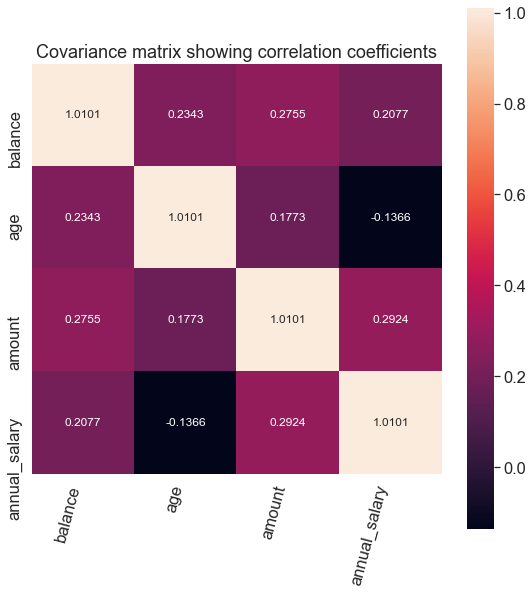

In [99]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.4f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
hm.set_xticklabels(hm.get_xticklabels(), rotation=75, horizontalalignment='right')
plt.show()

In [100]:
N_train = int(len(df_cus)*0.7)
X_train = df_cus.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_cus["annual_salary"].iloc[:N_train]
X_test = df_cus.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_cus["annual_salary"].iloc[N_train:]

In [103]:
linear_reg = LinearRegression()

In [104]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.2866418003328407

In [105]:
linear_reg.predict(X_test)

array([2730.03682972, 2055.48025501, 2072.29175833, 2263.97798637,
       1799.04393916, 2998.16532726, 2192.69640649, 2637.47020423,
       1586.16637317, 1696.35827126, 1903.23294153, 3293.60506783,
       1717.13695066, 2269.37464509, 2277.94494585, 2105.89035075,
       1569.34547123, 6230.69486099, 2067.67351941, 2017.69392926,
       1972.68601406, 3115.80566781, 2094.94993709, 3727.78610992,
       2410.7970991 , 1758.87587017, 1718.26387927, 1482.42019112,
       1436.4133794 , 2561.8686133 ])

In [106]:
linear_reg.score(X_test, Y_test)

-0.22684659015246078

As there is very little correlation between the columns the linear model would not be sufficient

## Decision Tree - Classification and Regression

In [107]:
df_cat = data[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [108]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_Female,gender_Male,merchant_state_Australian Capital Territory,merchant_state_New South Wales,merchant_state_Northern Territory,merchant_state_Queensland,merchant_state_South Australia,merchant_state_Tasmania,merchant_state_Victoria,merchant_state_Western Australia,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [111]:
N_train = int(len(data)*0.7)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = data["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = data["annual_salary"].iloc[N_train:]

## Classification

In [112]:
decision_tree_class = DecisionTreeClassifier()

In [114]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.7909845788849348

In [115]:
decision_tree_class.predict(X_test)

array([2840, 1013,  996, ..., 4054, 1043,  996], dtype=int64)

In [116]:
decision_tree_class.score(X_test, Y_test)

0.7553279822861888

## Regression

In [117]:
decision_tree_reg = DecisionTreeRegressor()

In [118]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7524228033767404

In [119]:
decision_tree_reg.predict(X_test)

array([3649.2       , 1012.4       , 1642.57894737, ..., 3446.625     ,
       1043.        , 1642.57894737])

In [120]:
decision_tree_reg.score(X_test, Y_test)

0.6816190640264115